# Time Series
Time series merupakan serangkaian pengamatan terhadap suatu peristiwa, kejadian, gejala atau perubahan yang terjadi dari waktu ke waktu. Sebagai contoh yaitu data yang dikumpulkan terkait dengan satuan waktu yaitu jam, hari, minggu, bulan, tahun, maupun semester dan data yang diamati sepanjang waktu. Pola data time series digunakan untuk menganalisis data masa lalu yang akan digunakan untuk meramalkan suatu nilai atau kejadian pada masa yang akan datang.

# Import Library

In [1]:
import sys
!{sys.executable} -m pip install pmdarima

In [2]:
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Membaca Data

In [3]:
beras = pd.read_csv('Supply_Beras.csv',index_col='Periode', parse_dates=True, sep = ';')
print(beras.shape)
print(beras.head())

(48, 1)
            Produksi
Periode             
2017-01-01    808181
2017-02-01    803341
2017-03-01    802040
2017-04-01    788637
2017-05-01    775817


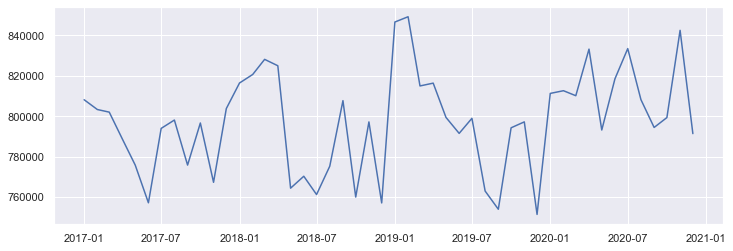

In [4]:
plt.figure(figsize=(12,4))
plt.plot(beras.index, beras['Produksi'])

# Memisah data

In [5]:
train = beras[:40]
test = beras[40:]

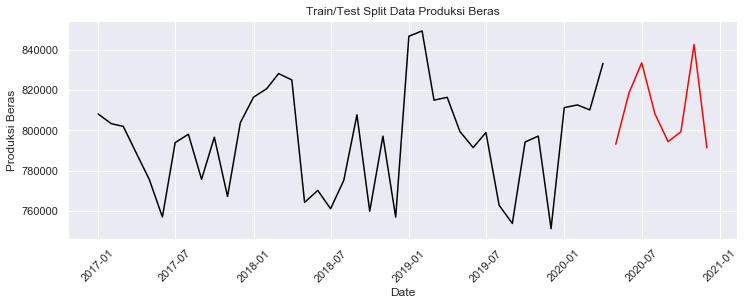

In [6]:
plt.figure(figsize=(12,4))
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Produksi Beras')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test Split Data Produksi Beras")
plt.show()

# ARMA
Metode Autoregressive Moving Average (ARMA) memodelkan langkah berikutnya dalam urutan sebagai fungsi linier dari pengamatan dan kesalahan residual pada deret waktu sebelumnya. Metode ini menggabungkan kedua model Autoregression (AR) dan Moving Average (MA).

## Implementasi Metode ARMA

In [7]:
y = train['Produksi']
ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()
y_pred_ARMA = ARMAmodel.get_forecast(15)
y_pred_df_ARMA = y_pred_ARMA.conf_int(alpha = 0.05) 
y_pred_df_ARMA["Predictions"] = ARMAmodel.predict(start = y_pred_df_ARMA.index[0], end = y_pred_df_ARMA.index[-1])
y_pred_out_ARMA = y_pred_df_ARMA["Predictions"] 

## Mencetak dan memvisualisasikan hasil prediksi metode ARMA

In [8]:
y_pred_out_ARMA

2020-05-01    819426.779515
2020-06-01    819302.224890
2020-07-01    819177.689198
2020-08-01    819053.172435
2020-09-01    818928.674599
2020-10-01    818804.195687
2020-11-01    818679.735696
2020-12-01    818555.294624
2021-01-01    818430.872466
2021-02-01    818306.469221
2021-03-01    818182.084886
2021-04-01    818057.719457
2021-05-01    817933.372932
2021-06-01    817809.045308
2021-07-01    817684.736583
Freq: MS, Name: Predictions, dtype: float64

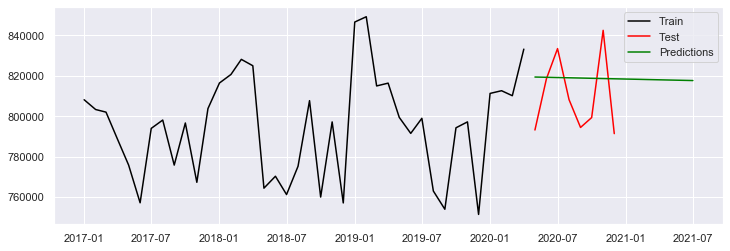

In [9]:
plt.figure(figsize=(12,4))
plt.plot(train, color = "black", label = "Train")
plt.plot(test, color = "red", label = "Test")
plt.plot(y_pred_out_ARMA, color='green', label = 'Predictions')
plt.legend()

In [10]:
arma_rmse = np.sqrt(mean_squared_error(y_pred_df_ARMA["Predictions"].values, y_pred_df_ARMA["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  0.0


# ARIMA
Metode Autoregressive Integrated Moving Average (ARIMA) memodelkan deret waktu berikutnya dalam urutan sebagai fungsi linier dari pengamatan yang berbeda dan kesalahan residual pada deret waktu sebelumnya. Metode ini menggabungkan kedua model Autoregression (AR) dan Moving Average (MA) serta langkah pra-pemrosesan diferensial dari urutan untuk membuat urutan stasioner, yang disebut integrasi (I).

## Implementasi Metode ARIMA

In [11]:
ARIMAmodel = ARIMA(y, order = (1, 0, 1))
ARIMAmodel = ARIMAmodel.fit()

y_pred_ARIMA = ARIMAmodel.get_forecast(15)
y_pred_df_ARIMA = y_pred_ARIMA.conf_int(alpha = 0.05) 
y_pred_df_ARIMA["Predictions"] = ARIMAmodel.predict(start = y_pred_df_ARIMA.index[0], end = y_pred_df_ARIMA.index[-1])
y_pred_out_ARIMA = y_pred_df_ARIMA["Predictions"]

## Mencetak dan memvisualisasikan hasil prediksi metode ARIMA

In [12]:
y_pred_out_ARIMA

2020-05-01    806960.204567
2020-06-01    799728.509072
2020-07-01    796858.819687
2020-08-01    795720.066379
2020-09-01    795268.185035
2020-10-01    795088.868981
2020-11-01    795017.712587
2020-12-01    794989.476228
2021-01-01    794978.271445
2021-02-01    794973.825151
2021-03-01    794972.060768
2021-04-01    794971.360623
2021-05-01    794971.082791
2021-06-01    794970.972541
2021-07-01    794970.928792
Freq: MS, Name: Predictions, dtype: float64

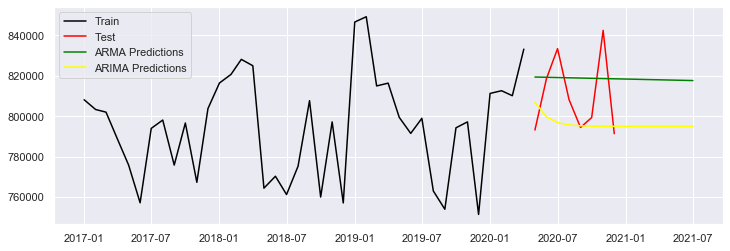

In [13]:
plt.figure(figsize=(12,4))
plt.plot(train, color = "black", label = "Train")
plt.plot(test, color = "red", label = "Test")
plt.plot(y_pred_out_ARMA, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out_ARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.legend()

In [14]:
arima_rmse = np.sqrt(mean_squared_error(y_pred_df_ARMA["Predictions"].values, y_pred_df_ARIMA["Predictions"]))
print("RMSE: ",arima_rmse)

RMSE:  22434.303489789225


# SARIMA
Seasonal Autoregressive Integrated Moving Average (SARIMA) merupakan pengembangan dari model Autoregressive Integrated Moving Average (ARIMA) padadata runtun waktu yang memiliki pola musiman.

## Implementasi SARIMA

In [15]:
SARIMAXmodel = SARIMAX(y, order = (1, 0, 1), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred_SARIMA = SARIMAXmodel.get_forecast(15)
y_pred_df_SARIMA = y_pred_SARIMA.conf_int(alpha = 0.05) 
y_pred_df_SARIMA["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_SARIMA.index[0], end = y_pred_df_SARIMA.index[-1])
y_pred_out_SARIMA = y_pred_df_SARIMA["Predictions"] 

## Mencetak dan memvisualisasikan hasil prediksi metode SARIMA

In [16]:
y_pred_out_SARIMA

2020-05-01    787949.329528
2020-06-01    780886.213211
2020-07-01    790456.543739
2020-08-01    745011.462047
2020-09-01    735978.210285
2020-10-01    789816.904091
2020-11-01    796521.871842
2020-12-01    736897.511420
2021-01-01    795907.857599
2021-02-01    799254.521417
2021-03-01    798154.965692
2021-04-01    829802.728025
2021-05-01    778830.927372
2021-06-01    771581.748646
2021-07-01    785073.230748
Freq: MS, Name: Predictions, dtype: float64

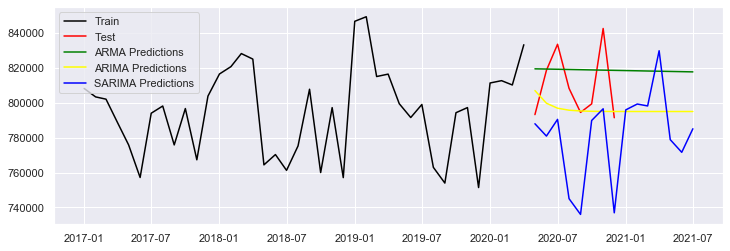

In [17]:
plt.figure(figsize=(12,4))
plt.plot(train, color = "black", label = "Train")
plt.plot(test, color = "red", label = "Test")
plt.plot(y_pred_out_ARMA, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out_ARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_out_SARIMA, color='Blue', label = 'SARIMA Predictions')
plt.legend()

In [18]:
sarima_rmse = np.sqrt(mean_squared_error(y_pred_df_ARMA["Predictions"].values, y_pred_df_SARIMA["Predictions"]))
print("SARIMA RMSE: ",sarima_rmse)

SARIMA RMSE:  44566.41047446371
